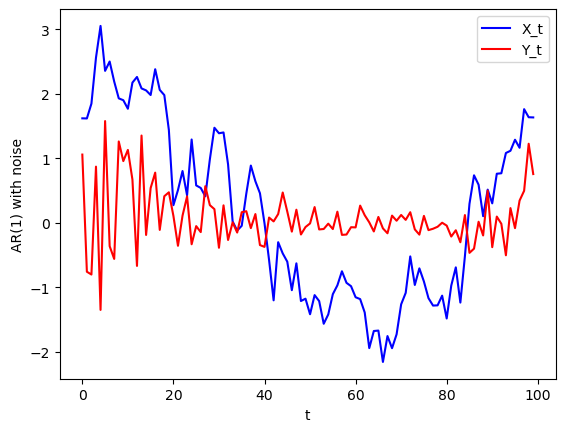

In [3]:
#This file contains illustration in the figures presented in section 5.2 in the paper 
# and should be supplement by the file 'class_SV.py'.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from class_SV import SV

#SV model
T=100
phi=0.9
sigmax=0.4
sigmay=.25
sigma0=(1-phi**2)**-0.5*sigmax
theta=np.array([phi,sigmax,sigmay])

np.random.seed(0)#0
X_true=[np.random.normal(0,sigma0)]
for t in range(T-1):   
    X_true.append(X_true[-1]*phi+np.random.normal(0,sigmax))
Y=np.random.normal(0,sigmay*np.exp(np.array(X_true)/2))
plt.plot(X_true,color='b',label='X_t')
plt.plot(Y,color='r',label='Y_t')
plt.xlabel("t")
plt.ylabel("AR(1) with noise")
plt.legend()    
model=SV(Y)

(array([0.93]), array([0.38947368]))

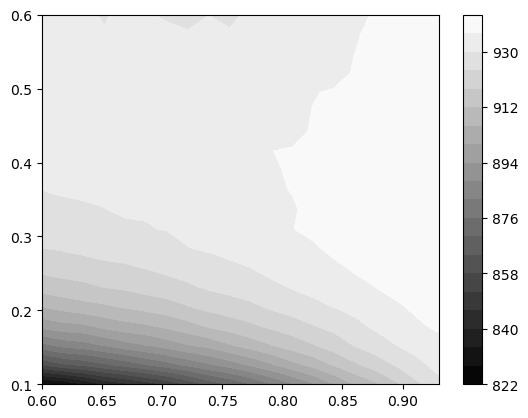

In [4]:
num_phi,num_sigmay=20,20
phis = np.linspace(0.6, .93, num_phi)
sigmays = np.linspace(0.1, 0.6, num_sigmay)
Z=np.zeros([num_sigmay,num_phi])
for i in range(num_phi):
    for j in range(num_sigmay):
        Z[j,i]= model.llhd(phis[i], sigmax,sigmays[j],20000)

plt.contourf(phis, sigmays, Z, 20, cmap=cm.gray)
plt.colorbar();
ind=np.where(Z==np.max(Z))
phis[ind[1]],sigmays[ind[0]]

In [5]:
#onGA
N=1000
#theta0=np.array([phi0,sigmax0,sigmay0])
c1=0.0012#c1*T=1
c2=0.05
A=10
alpha=1
gamma=1/6

theta0=np.array([.65,sigmax,.3])
REP=1
r1=.6
r2=1

np.random.seed(1)
model.onGA_2p(theta0,c1,A,alpha,N,r1,r2,REP)
#plt.plot(model.thetalist)

Text(0, 0.5, '$\\sigma_{y}$')

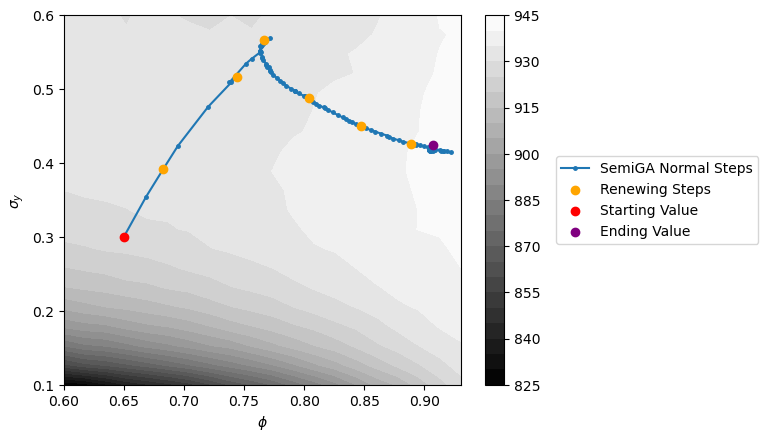

In [6]:
#plot for onGA
plt.contourf(phis, sigmays, Z, 23, cmap=cm.gray)
plt.colorbar();
ind=np.where(Z==np.max(Z))
phis[ind[1]],sigmays[ind[0]]
trace=model.thetalist.T
plt.plot(trace[0],trace[2],marker='.', markersize = 5,label='SemiGA Normal Steps')
#plt.scatter(trace[0],trace[2],color='blue')
plt.scatter(trace[0][model.renew_t],trace[2][model.renew_t],color='orange',label='Renewing Steps',zorder=2)
plt. scatter(trace[0][0],trace[2][0], marker = 'o',color='red',label='Starting Value',zorder=2)
plt. scatter(trace[0][-1],trace[2][-1], marker = 'o',color='purple',label='Ending Value',zorder=2)
plt.legend(bbox_to_anchor=(1.24, 0.5), loc="center left", borderaxespad=0)
plt.xlabel('$\phi$')
plt.ylabel('$\sigma_{y}$')

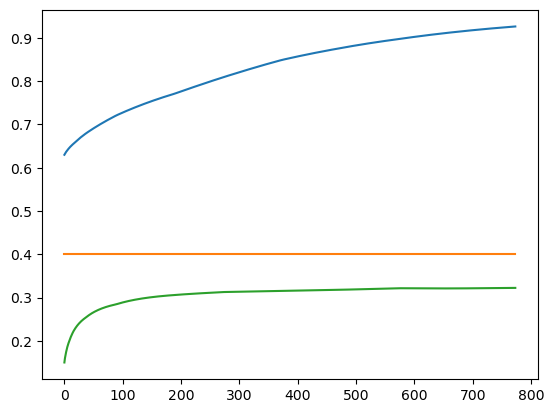

In [7]:
#AGA
N=5000
#theta0=np.array([phi0,sigmax0,sigmay0])
c1=0.0012#c1*T=1
c2=0.05
A=200
alpha=1
gamma=1/6
S=1
model=SV(Y)
I=12#35
r=.3
inner_K=100
np.random.seed(0)
model.AGA_2p(np.array([.63,.4,.15]),c1*2,A,alpha,I,N,r,inner_K)

plt.plot(model.thetalist);

Text(0, 0.5, '$\\sigma_{y}$')

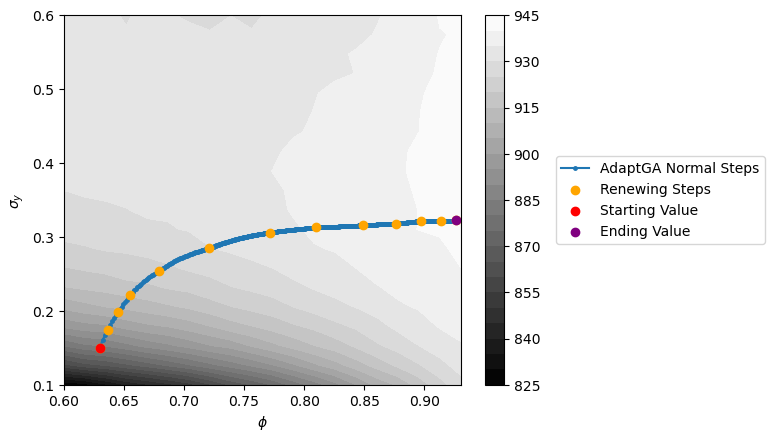

In [8]:
#plot for AGA
plt.contourf(phis, sigmays, Z, 23, cmap=cm.gray)
plt.colorbar();
ind=np.where(Z==np.max(Z))
phis[ind[1]],sigmays[ind[0]]
trace=model.thetalist.T
plt.plot(trace[0],trace[2],marker='.', markersize = 5,label='AdaptGA Normal Steps')
#plt.scatter(trace[0],trace[2],color='blue')
plt.scatter(trace[0][model.newt],trace[2][model.newt],color='orange',label='Renewing Steps',zorder=2)
plt. scatter(trace[0][0],trace[2][0], marker = 'o',color='red',label='Starting Value',zorder=2)
plt. scatter(trace[0][-1],trace[2][-1], marker = 'o',color='purple',label='Ending Value',zorder=2)
plt.legend(bbox_to_anchor=(1.24, 0.5), loc="center left", borderaxespad=0)
plt.xlabel('$\phi$')
plt.ylabel('$\sigma_{y}$')
#model.newt